In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [258]:
# Experiments path
path = "C:\\Users\\Luiz Fernando\\JupyterFiles\\Quantifier-project\\Quantifiers\\experiments"
datas = []

for i in range(len(os.listdir(path))):
    datas.append(pd.read_csv(f"C:\\Users\\Luiz Fernando\\JupyterFiles\\Quantifier-project\\Quantifiers\\experiments\\experiment{i+1}.csv"))
np.array(datas)

array([[[1, 10, 0.0, ..., 0.0, 0.0, 'CC'],
        [1, 10, 0.0, ..., 0.0, 0.0, 'ACC'],
        [1, 10, 0.0, ..., 0.05, 0.05, 'PCC'],
        ...,
        [3, 100, 1.0, ..., 0.0, 0.0, 'HDy'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'DyS'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'SORD']],

       [[1, 10, 0.0, ..., 0.0, 0.0, 'CC'],
        [1, 10, 0.0, ..., 0.0, 0.0, 'ACC'],
        [1, 10, 0.0, ..., 0.01, 0.01, 'PCC'],
        ...,
        [3, 100, 1.0, ..., 0.0, 0.0, 'HDy'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'DyS'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'SORD']],

       [[1, 10, 0.0, ..., 0.1, 0.1, 'CC'],
        [1, 10, 0.0, ..., 1.0, 1.0, 'ACC'],
        [1, 10, 0.0, ..., 0.21, 0.21, 'PCC'],
        ...,
        [3, 100, 1.0, ..., 0.04, 0.04, 'HDy'],
        [3, 100, 1.0, ..., 0.02, 0.02, 'DyS'],
        [3, 100, 1.0, ..., 0.0, 0.0, 'SORD']]], dtype=object)

In [259]:
datas[1][datas[1]['quantifier'] == 'CC'].head(40)

,sample,Test_size,alpha,actual_prop,pred_prop,abs_error,quantifier
0,1,10,0.0,0.0,0.00,0.00,CC
11,2,10,0.0,0.0,0.00,0.00,CC
22,3,10,0.0,0.0,0.00,0.00,CC
33,1,10,0.1,0.1,0.10,0.00,CC
44,2,10,0.1,0.1,0.10,0.00,CC
55,3,10,0.1,0.1,0.10,0.00,CC
66,1,10,0.2,0.2,0.20,0.00,CC
77,2,10,0.2,0.2,0.20,0.00,CC
88,3,10,0.2,0.2,0.20,0.00,CC
99,1,10,0.3,0.3,0.30,0.00,CC


In [260]:

sizes = datas[0]['Test_size'].unique()
alphas = datas[0]['alpha'].unique()[:-1]
quantifiers = datas[0]['quantifier'].unique()
list_datas = []
for data in datas:
    abs_err = pd.DataFrame(columns=['size', 'alpha', 'abs_error', 'qtf'])
    for qtf in quantifiers:   
        qtf_data = data[data['quantifier'] == qtf]
        for size in sizes:
            for alpha in alphas:
                median_abs_sample = round(qtf_data.loc[(qtf_data['Test_size'] == size) & 
                                                 (qtf_data['alpha'] == alpha)]['abs_error'].mean(), 2)
                df_ext = {'size':size, 'alpha':alpha, 'abs_error':median_abs_sample, 'qtf':qtf}
                abs_err = pd.concat([abs_err, pd.DataFrame([df_ext.values()], columns=abs_err.columns)], ignore_index=True)
    list_datas.append(abs_err)

In [261]:
list_datas[1].head(50)

,size,alpha,abs_error,qtf
0,10,0.0,0.00,CC
1,10,0.1,0.00,CC
2,10,0.2,0.00,CC
3,10,0.3,0.00,CC
4,10,0.4,0.00,CC
5,10,0.5,0.00,CC
6,10,0.6,0.00,CC
7,10,0.7,0.00,CC
8,10,0.8,0.00,CC
9,10,0.9,0.00,CC


In [262]:
list_size_for_alpha = []
for d in list_datas:    
    size_for_alpha = {}
    for size in sizes:
        size_for_alpha[size] = {}
        for qtf in quantifiers:
            size_for_alpha[size][qtf] = d.loc[(d['qtf'] == qtf) & (d['size'] == size)]
    list_size_for_alpha.append(size_for_alpha)

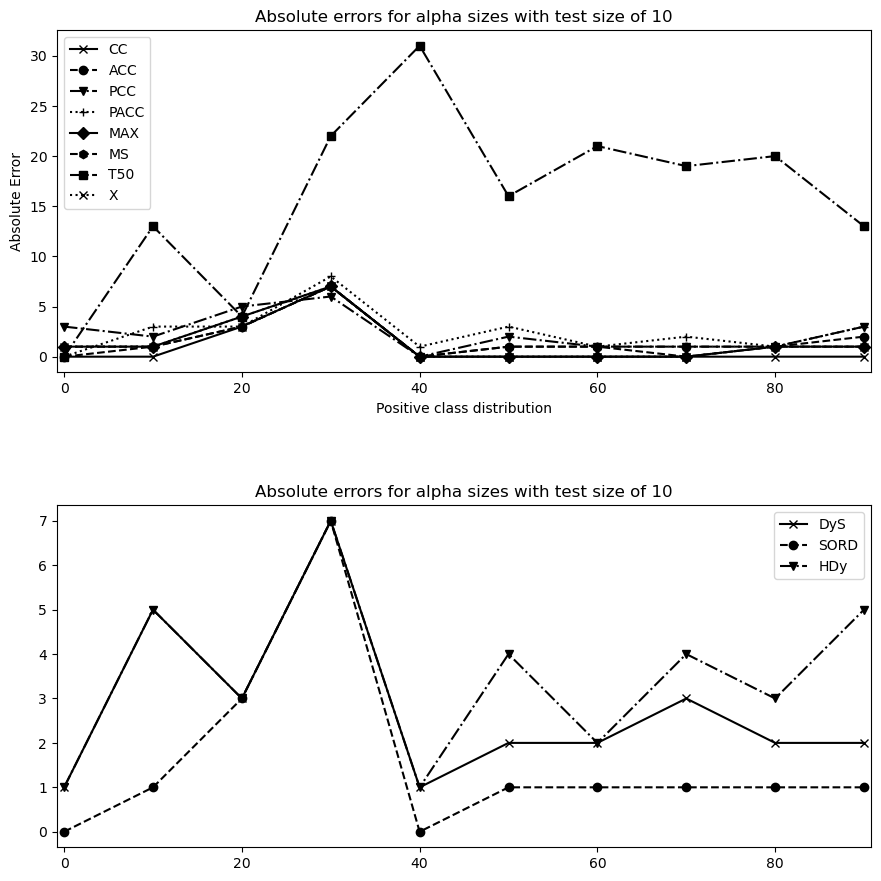

In [263]:
qtfs = ['CC', 'ACC', 'PCC', 'PACC', 'MAX', 'MS', 'T50', 'X']
markers = ['x', 'o', 'v', '+', 'D', 'h', 's', 'x', '+', 'h', 'D']
lines=['-', '--', '-.', ':'] * 3

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(alphas*100, list_size_for_alpha[0][10][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(alphas*100, list_size_for_alpha[0][10][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for alpha sizes with test size of 10')
ax1.legend()
ax1.set_xlim([-0.8, 90.8])

ax2.set_title('Absolute errors for alpha sizes with test size of 10')
ax2.legend()
ax2.set_xlim([-0.8, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

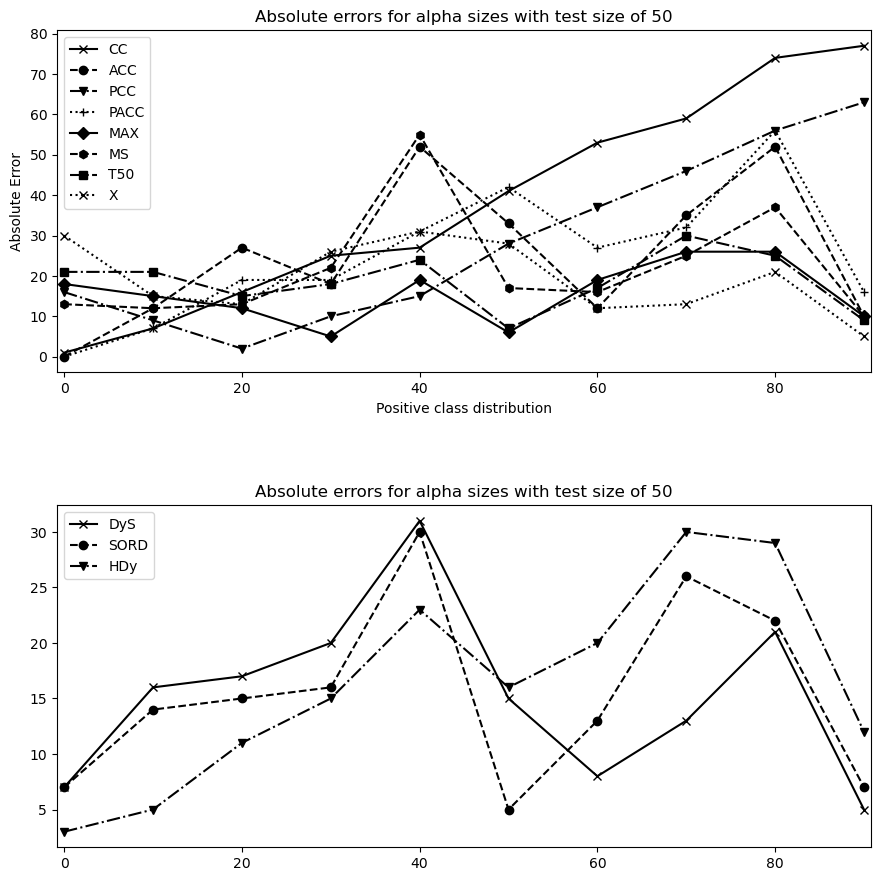

In [264]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(alphas*100, list_size_for_alpha[2][50][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(alphas*100, list_size_for_alpha[2][50][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for alpha sizes with test size of 50')
ax1.legend()
ax1.set_xlim([-0.8, 90.8])

ax2.set_title('Absolute errors for alpha sizes with test size of 50')
ax2.legend()
ax2.set_xlim([-0.8, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

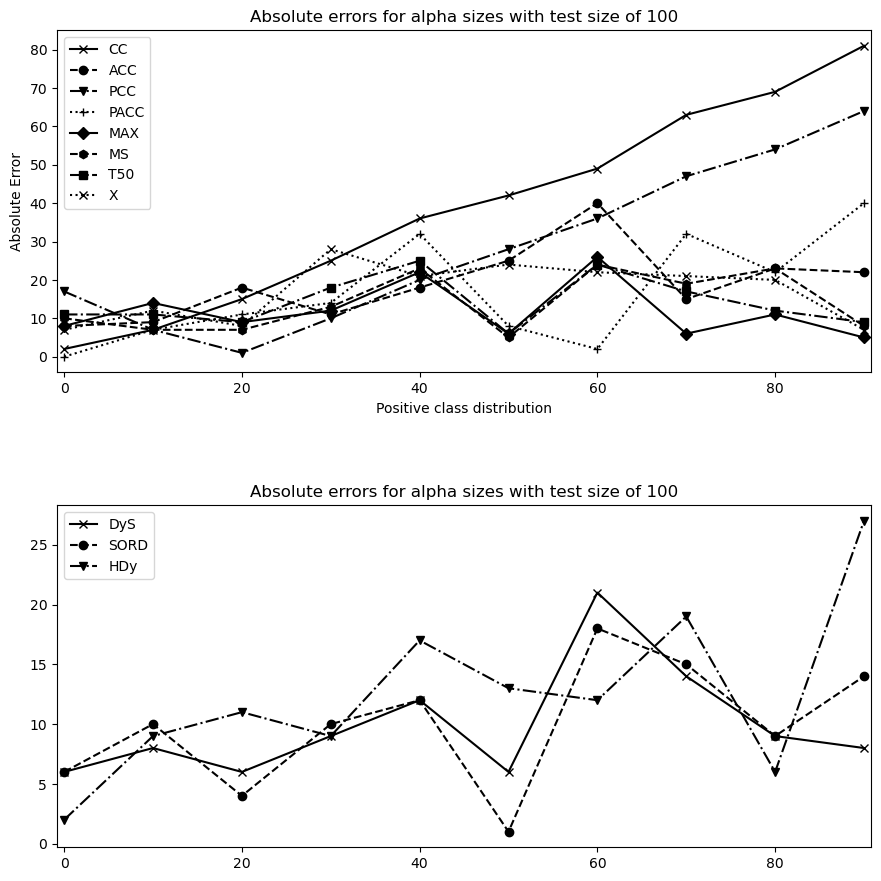

In [265]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for i, qtf in enumerate(qtfs):
    ax1.plot(alphas*100, list_size_for_alpha[2][100][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
for i, qtf in enumerate(['DyS', 'SORD', 'HDy']):
    ax2.plot(alphas*100, list_size_for_alpha[2][100][qtf]['abs_error']*100, label=qtf, linestyle=lines[i], 
         marker=markers[i], color='black')
    
ax1.set_title('Absolute errors for alpha sizes with test size of 100')
ax1.legend()
ax1.set_xlim([-0.8, 90.8])

ax2.set_title('Absolute errors for alpha sizes with test size of 100')
ax2.legend()
ax2.set_xlim([-0.8, 90.8])

ax1.set_xlabel('Positive class distribution')
ax1.set_ylabel('Absolute Error')

fig.tight_layout(pad=5)
plt.show()

In [266]:
j = 2
all_qtf10 = []
all_qtf50 = []
all_qtf100 = []
for i in list_size_for_alpha[j][10]:
    all_qtf10.append(np.array(list_size_for_alpha[j][10][i]['abs_error']))
for i in list_size_for_alpha[j][50]:
    all_qtf50.append(np.array(list_size_for_alpha[j][50][i]['abs_error']))
for i in list_size_for_alpha[j][50]:
    all_qtf100.append(np.array(list_size_for_alpha[j][50][i]['abs_error']))
all_qtf10

[array([0.03, 0.03, 0.2 , 0.27, 0.37, 0.43, 0.5 , 0.6 , 0.67, 0.73]),
 array([0.33, 0.63, 0.2 , 0.43, 0.47, 0.5 , 0.47, 0.57, 0.2 , 0.1 ]),
 array([0.18, 0.09, 0.07, 0.1 , 0.2 , 0.28, 0.38, 0.46, 0.53, 0.63]),
 array([0.21, 0.34, 0.2 , 0.27, 0.3 , 0.29, 0.37, 0.57, 0.22, 0.2 ]),
 array([0.72, 0.09, 0.19, 0.31, 0.48, 0.31, 0.25, 0.25, 0.35, 0.26]),
 array([0.27, 0.17, 0.08, 0.25, 0.24, 0.2 , 0.37, 0.4 , 0.41, 0.32]),
 array([0.32, 0.25, 0.04, 0.38, 0.33, 0.26, 0.37, 0.38, 0.36, 0.38]),
 array([0.29, 0.4 , 0.1 , 0.13, 0.1 , 0.32, 0.2 , 0.37, 0.32, 0.12]),
 array([0.36, 0.09, 0.11, 0.33, 0.24, 0.15, 0.21, 0.2 , 0.18, 0.24]),
 array([0.31, 0.12, 0.18, 0.32, 0.26, 0.16, 0.14, 0.19, 0.2 , 0.31]),
 array([0.19, 0.3 , 0.2 , 0.3 , 0.39, 0.29, 0.31, 0.32, 0.33, 0.15])]

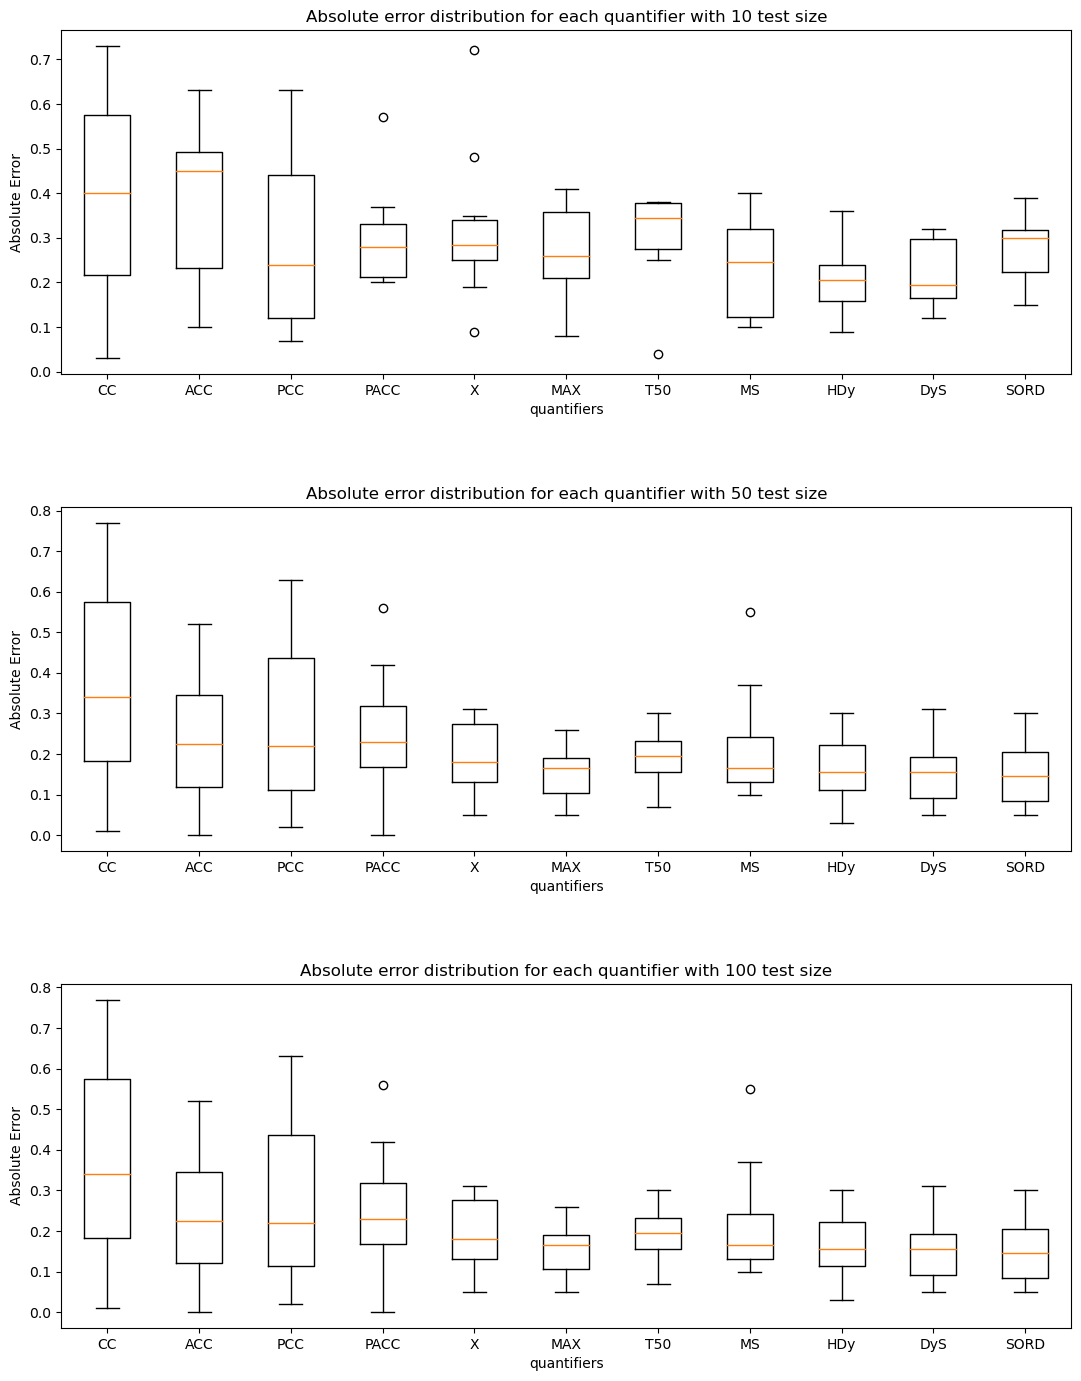

In [267]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 15))

ax1.boxplot(all_qtf10)
ax2.boxplot(all_qtf50)
ax3.boxplot(all_qtf100)

ax1.set_xticks(range(1, 12), quantifiers)
ax1.set_title("Absolute error distribution for each quantifier with 10 test size")
ax1.set_xlabel("quantifiers")
ax1.set_ylabel("Absolute Error")

ax2.set_xticks(range(1, 12), quantifiers)
ax2.set_title("Absolute error distribution for each quantifier with 50 test size")
ax2.set_xlabel("quantifiers")
ax2.set_ylabel("Absolute Error")

ax3.set_xticks(range(1, 12), quantifiers)
ax3.set_title("Absolute error distribution for each quantifier with 100 test size")
ax3.set_xlabel("quantifiers")
ax3.set_ylabel("Absolute Error")

fig.tight_layout(pad=5)
plt.show()

In [268]:
df_mean_err = pd.DataFrame(columns=["Data1", "Data2", "Data3"], index=quantifiers)

for i in range(len(list_size_for_alpha)):
    for size in list_size_for_alpha[i]:
        for idx, qtf in enumerate(list_size_for_alpha[i][size]):
            df_mean_err.iloc[idx, i] =  round(list_size_for_alpha[i][size][qtf]['abs_error'].median(), 2)          

In [269]:
df_mean_err

,Data1,Data2,Data3
CC,0.01,0.01,0.39
ACC,0.01,0.01,0.18
PCC,0.01,0.02,0.24
PACC,0.02,0.01,0.12
X,0.01,0.01,0.21
MAX,0.01,0.01,0.1
T50,0.17,0.02,0.11
MS,0.01,0.01,0.12
HDy,0.01,0.02,0.11
DyS,0.01,0.01,0.08


In [270]:
df_mean_err = df_mean_err.rank(ascending=False)
df_mean_err2 = pd.DataFrame(columns=df_mean_err.index, index=df_mean_err.columns)
for i, data in enumerate(df_mean_err):
    df_mean_err2.iloc[i] = df_mean_err[data]
df_mean_err2

,CC,ACC,PCC,PACC,X,MAX,T50,MS,HDy,DyS,SORD
Data1,7.0,7.0,7.0,2.0,7.0,7.0,1.0,7.0,7.0,7.0,7.0
Data2,7.5,7.5,2.0,7.5,7.5,7.5,2.0,7.5,2.0,7.5,7.5
Data3,1.0,4.0,2.0,5.5,3.0,9.5,7.5,5.5,7.5,11.0,9.5


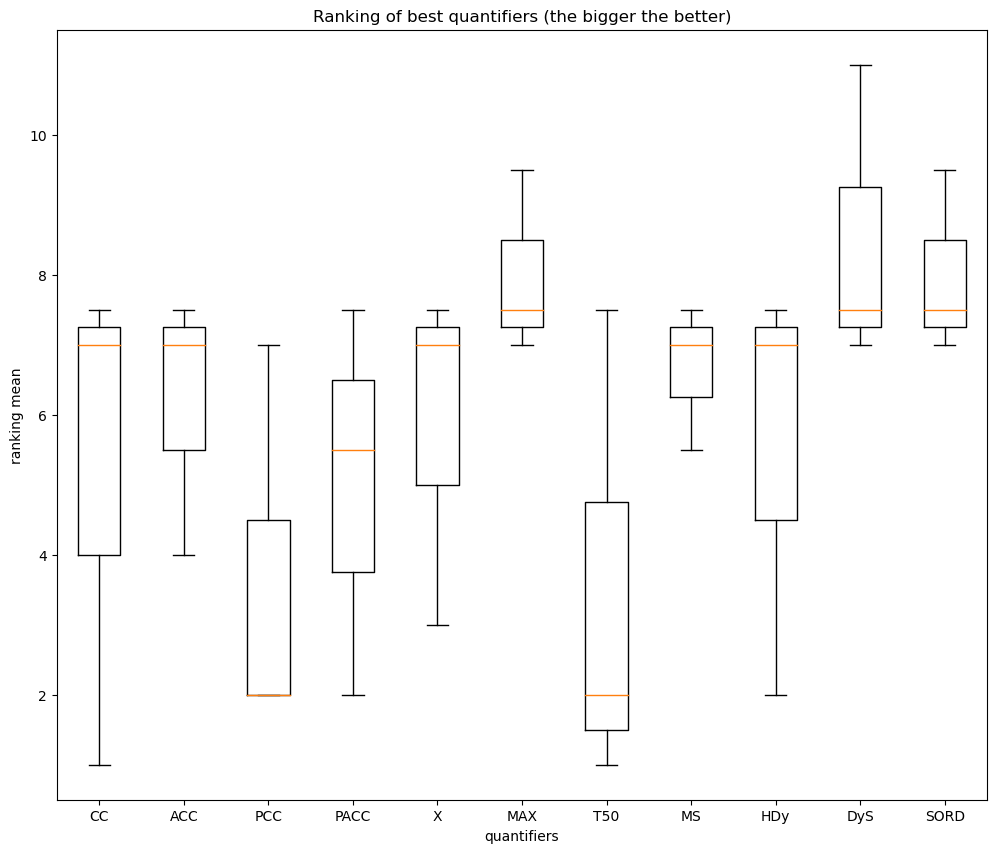

In [271]:
plt.figure(figsize=(12, 10))
plt.boxplot(df_mean_err2)
plt.xticks(range(1, 12), quantifiers)
plt.xlabel("quantifiers")
plt.ylabel("ranking mean")
plt.title("Ranking of best quantifiers (the bigger the better)")
plt.show()